# **TALENTO TECH**
# **RETO 1**
## Grupo 2

- Monica ...
- Juan Pablo ....
- Juan Pablo ....
- Hildebrando Vargas

## Tareas
1. Cargar los Datos
2. Exploración de Datos del Dataframe
3. Generación de Estadísticas Descriptivas
4. Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión
5. Identificación y manejo de valores atípicos y tendencias en los datos
6. Uso de técnicas como imputación de la media, mediana y regresión para completar datos faltantes.
7. Eliminación de registros con datos faltantes o imputación de valores categóricos.
8. Aplicación de técnicas de One-hot encoding, Label encoding, y Ordinal encoding.
9. Cálculo y visualización de matrices de correlación.
10. Aplicación de PCA para reducir la dimensionalidad de datasets


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns


---
## **1) Cargar Datos**

In [3]:
df = pd.read_csv('./dataset_renovables_con_errores.csv')
df

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.0,NaN,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,NaN,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.0,NaN,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1
...,...,...,...,...,...,...,...,...,...,...,...
995,EcoWind,Hidrógeno verde,Bajo,20,NaN,522.12,254202.65975484328,Norte,2996.979129,2020,1
996,Solaris,Eólica,Medio,23,7.0,NaN,203987.26419996214,Este,2846.525998,2010,1
997,SunWave,Eólica,Bajo,22,NaN,207.35,100951.73810650186,Norte,2896.677042,2005,0
998,VientoVerde,Eólica,Bajo,20,16.0,418.24,NaN,Este,2996.979129,2015,1


---
## **2) Explorar datos**

> Añadir blockquote



In [4]:
df.describe()

,Número de Proyectos en Marcha,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,810.000000,1000.000000,1000.000000,1000.00000
mean,10.262963,2620.846302,2012.175000,0.58400
std,5.447467,653.454384,5.605872,0.49314
min,1.000000,1542.598865,2005.000000,0.00000
25%,6.000000,2044.109301,2005.000000,0.00000
50%,10.000000,2620.846302,2010.000000,1.00000
75%,15.000000,3197.583303,2015.000000,1.00000
max,19.000000,3749.244782,2020.000000,1.00000



Filas



In [5]:
df.shape[1]*df.shape[0]

11000

Columnas

In [6]:
df.columns

Index(['Planta Energética', 'Tipo de Energía',
       'Nivel de Democratización Energética',
       'Número de Comunidades Energéticas', 'Número de Proyectos en Marcha',
       'Capacidad Generada (MW)', 'Reducción de CO2 (toneladas)', 'Región',
       'Costo de Producción ($/MW)', 'Año de Instalación',
       'Rentabilidad en 10 años (Rentable=1, No Rentable=0)'],
      dtype='object')

Tipo de datos

In [8]:
df.dtypes

Planta Energética                                       object
Tipo de Energía                                         object
Nivel de Democratización Energética                     object
Número de Comunidades Energéticas                       object
Número de Proyectos en Marcha                          float64
Capacidad Generada (MW)                                 object
Reducción de CO2 (toneladas)                            object
Región                                                  object
Costo de Producción ($/MW)                             float64
Año de Instalación                                       int64
Rentabilidad en 10 años (Rentable=1, No Rentable=0)      int64
dtype: object

* Cualitativo Nominal

In [9]:
df['Planta Energética'].value_counts()

Planta Energética
SunWave        145
VientoVerde    134
Solaris        133
EcoWind        124
SolarFlow      119
WindStream     116
HydroFlux      112
AquaPower      112
error            5
Name: count, dtype: int64

In [10]:
df['Tipo de Energía'].value_counts()

Tipo de Energía
Solar              194
Hidráulica         193
Geotérmica         188
Eólica             188
Hidrógeno verde    159
error                7
Name: count, dtype: int64

In [11]:
df['Región'].value_counts()

Región
Este     246
Sur      238
Oeste    230
Norte    224
Name: count, dtype: int64

* Cuantitatvivo Ordinal

In [12]:
df['Nivel de Democratización Energética'].value_counts()

Nivel de Democratización Energética
Medio    369
Alto     268
Bajo     257
error      6
Name: count, dtype: int64

In [13]:
df['Año de Instalación'].value_counts()

Año de Instalación
2005    277
2015    256
2010    239
2020    228
Name: count, dtype: int64

In [14]:
df['Número de Comunidades Energéticas'].value_counts()

Número de Comunidades Energéticas
49     30
45     30
21     30
41     29
38     28
17     28
15     28
8      27
12     27
32     26
40     26
27     25
36     24
23     24
5      24
48     23
28     23
22     23
25     23
33     23
7      22
39     22
31     22
42     22
44     22
30     22
26     21
43     21
16     20
34     20
47     20
24     20
10     19
14     19
13     18
9      18
29     17
20     17
35     17
19     16
18     16
46     16
37     16
6      16
11     15
@#$     5
Name: count, dtype: int64

* El resto son cuantitaivas

---
## **3) Generar Estaditicas Descriptivas**

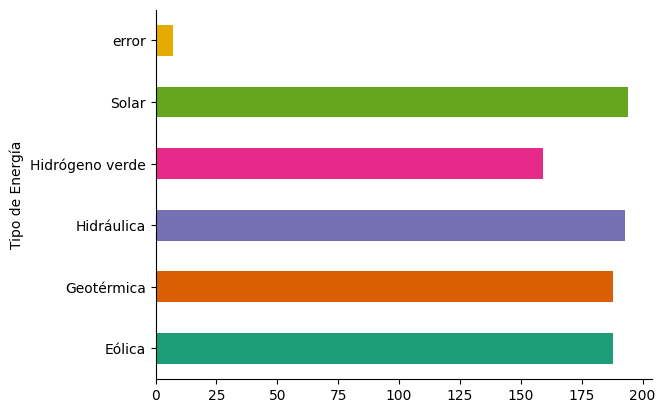

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Tipo de Energía').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
df_eliminados = df.dropna(subset=['Número de Comunidades Energéticas', 'Número de Proyectos en Marcha', 'Capacidad Generada (MW)', 'Reducción de CO2 (toneladas)', 'Costo de Producción ($/MW)'])
df_eliminados

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.0,100.46,48910.59373127165,Sur,1893.656170,2005,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.0,404.25,196815.72283363095,Norte,2144.411388,2020,1
5,VientoVerde,NaN,Alto,30,12.0,449.46,218826.95061175947,Oeste,2495.468693,2005,1
7,EcoWind,Geotérmica,Alto,25,6.0,661.47,322047.48591901513,Sur,2746.223911,2005,1
8,SolarFlow,Geotérmica,Bajo,46,1.0,17.98,8753.857010633728,Norte,1693.051996,2010,1
...,...,...,...,...,...,...,...,...,...,...,...
989,VientoVerde,Solar,Bajo,26,7.0,761.72,370855.83771634725,Este,2696.072867,2020,0
990,WindStream,NaN,Bajo,41,13.0,715.54,348372.34957668843,NaN,1943.807214,2010,0
992,WindStream,Geotérmica,Alto,11,8.0,476.6,232040.5034075659,Oeste,3448.338521,2005,0
993,SunWave,Solar,Medio,18,7.0,477.79,232619.87436655667,Este,3097.281216,2020,1


In [17]:
df_eliminados['Número de Comunidades Energéticas'].isnull().sum()


0

In [19]:
Tipo_dato = ['media', 'mediana', 'desv_estandar', 'varianza', 'v_minimo', 'v_maximo', 'cantidad']

Planta_Energética_Est = [0, 0, 0, 0,

                         df['Número de Comunidades Energéticas'].min(),
                         df['Número de Comunidades Energéticas'].max(),
                         df['Número de Comunidades Energéticas'].count()
                        ]

Número_Proyectos_Marcha_Est	= [
                               df['Número de Proyectos en Marcha'].mean(),
                               df['Número de Proyectos en Marcha'].median(),
                               df['Número de Proyectos en Marcha'].std(),
                               df['Número de Proyectos en Marcha'].var(),
                               df['Número de Proyectos en Marcha'].min(),
                               df['Número de Proyectos en Marcha'].max(),
                               df['Número de Proyectos en Marcha'].count()
                              ]

Capacidad_Generada_Est = [0, 0, 0, 0,  0,  0,
                          df['Capacidad Generada (MW)'].count()
                         ]

Reducción_de_CO2 = [0, 0, 0, 0,  0,  0,
                    df['Reducción de CO2 (toneladas)'].count()
                   ]

Costo_de_Producción = [
                       df['Costo de Producción ($/MW)'].mean(),
                       df['Costo de Producción ($/MW)'].median(),
                       df['Costo de Producción ($/MW)'].std(),
                       df['Costo de Producción ($/MW)'].var(),
                       df['Costo de Producción ($/MW)'].min(),
                       df['Costo de Producción ($/MW)'].max(),
                       df['Costo de Producción ($/MW)'].count()
                      ]

Año_de_Instalación = [map(int, df['Año de Instalación'].unique())]




In [21]:
df_est = pd.DataFrame({
  'Tipo_dato': Tipo_dato,
  'Planta_Energética_Est': Planta_Energética_Est,
  'Número_Proyectos_Marcha_Est': Número_Proyectos_Marcha_Est,
  'Capacidad_Generada_Est': Capacidad_Generada_Est,
  'Reducción_de_CO2': Reducción_de_CO2,
  'Costo_de_Producción': Costo_de_Producción,
})
df_est

,Tipo_dato,Planta_Energética_Est,Número_Proyectos_Marcha_Est,Capacidad_Generada_Est,Reducción_de_CO2,Costo_de_Producción
0,media,0,10.262963,0,0,2620.846302
1,mediana,0,10.000000,0,0,2620.846302
2,desv_estandar,0,5.447467,0,0,653.454384
3,varianza,0,29.674894,0,0,427002.631331
4,v_minimo,10,1.000000,0,0,1542.598865
5,v_maximo,@#$,19.000000,0,0,3749.244782
6,cantidad,1000,810.000000,832,943,1000.000000


---
## **4) Visualización de datos utilizando gráficos de barras, histogramas y gráficos de dispersión**

In [24]:
# Convert all columns in df_bigotes to numeric type
df_bigotes = [pd.to_numeric(df['Número de Comunidades Energéticas'], errors='coerce'),
              pd.to_numeric(df['Número de Proyectos en Marcha'], errors='coerce'),
              pd.to_numeric(df['Capacidad Generada (MW)'], errors='coerce'),
              pd.to_numeric(df['Reducción de CO2 (toneladas)'], errors='coerce'),
              pd.to_numeric(df['Costo de Producción ($/MW)'], errors='coerce')
             ]

plt.figure(figsize=(18, 7))
sns.boxplot(x=  data=df_bigotes)

SyntaxError: invalid syntax (3701433192.py, line 10)

In [25]:
df_eliminados.isnull().sum()

Planta Energética                                       0
Tipo de Energía                                        44
Nivel de Democratización Energética                    65
Número de Comunidades Energéticas                       0
Número de Proyectos en Marcha                           0
Capacidad Generada (MW)                                 0
Reducción de CO2 (toneladas)                            0
Región                                                 45
Costo de Producción ($/MW)                              0
Año de Instalación                                      0
Rentabilidad en 10 años (Rentable=1, No Rentable=0)     0
dtype: int64

In [26]:
df['Número de Comunidades Energéticas'].isnull().sum()

0

(array([119., 145., 124., 112.,   0., 134., 116.,   5., 112., 133.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

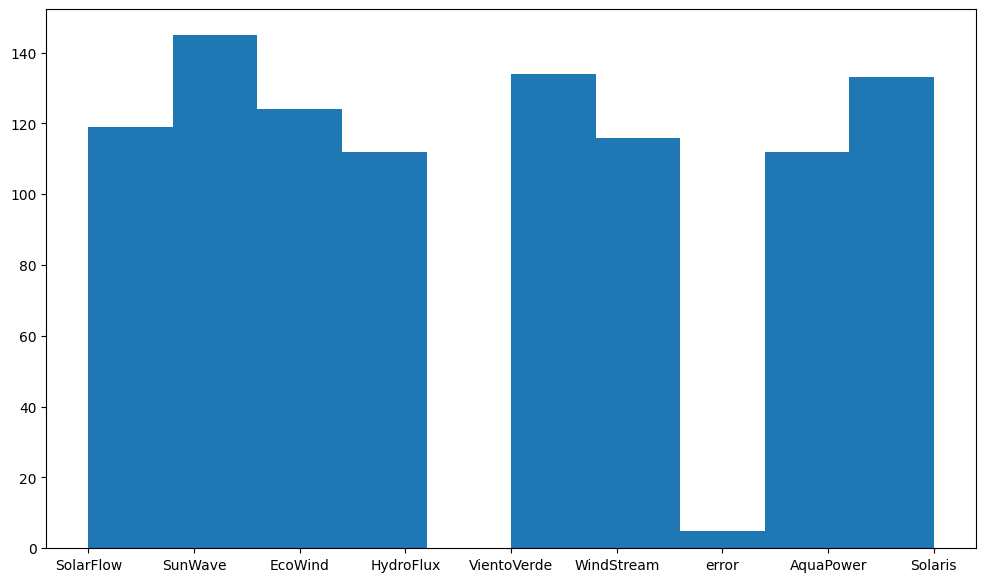

In [27]:
plt.figure(figsize=(12, 7))
plt.hist(df['Planta Energética'])


In [69]:
df['Tipo de Energía'].isnull().sum()

71

<Axes: >

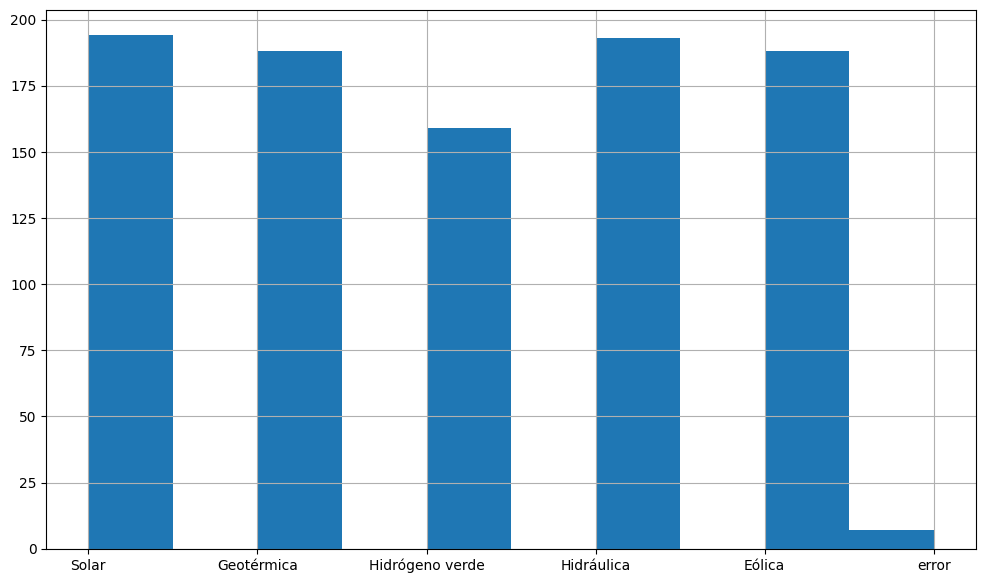

In [70]:
plt.figure(figsize=(12, 7))
(df['Tipo de Energía']).hist()


<Axes: >

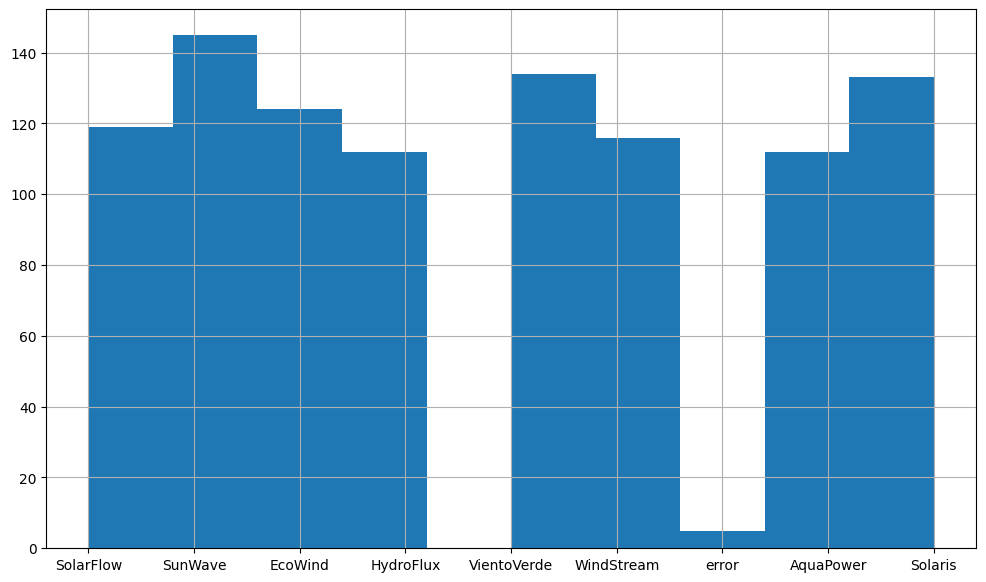

In [71]:
plt.figure(figsize=(12, 7))
(df['Planta Energética']).hist()


<Axes: >

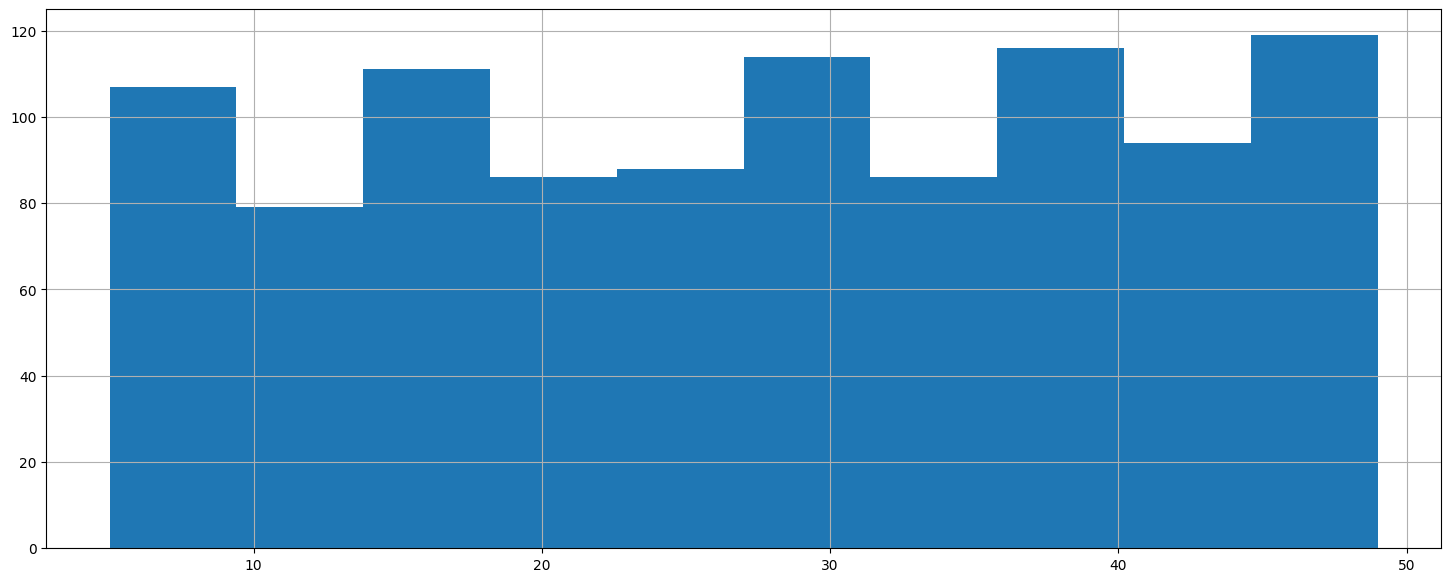

In [ ]:
plt.figure(figsize=(18, 7))
(df['Número de Comunidades Energéticas']).hist()

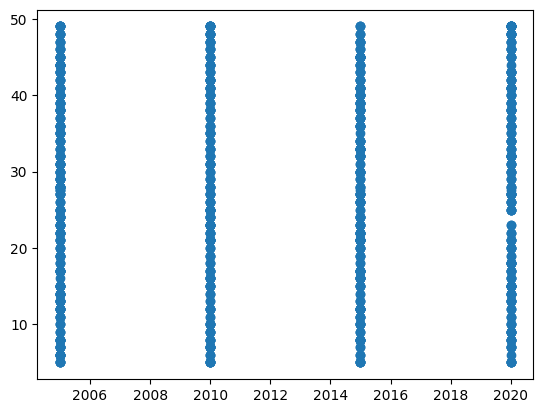

In [ ]:
plt.scatter(df['Año de Instalación'], df['Número de Comunidades Energéticas'])

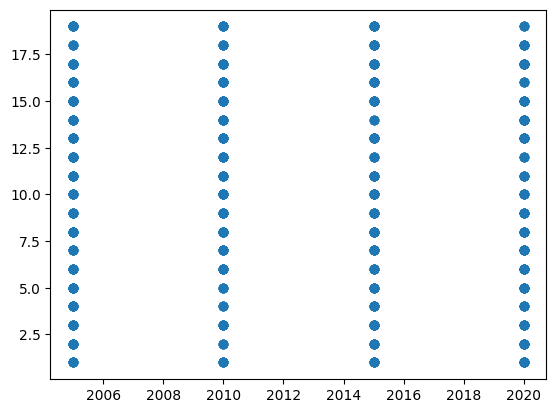

In [72]:
plt.scatter(df['Año de Instalación'], df['Número de Proyectos en Marcha'])

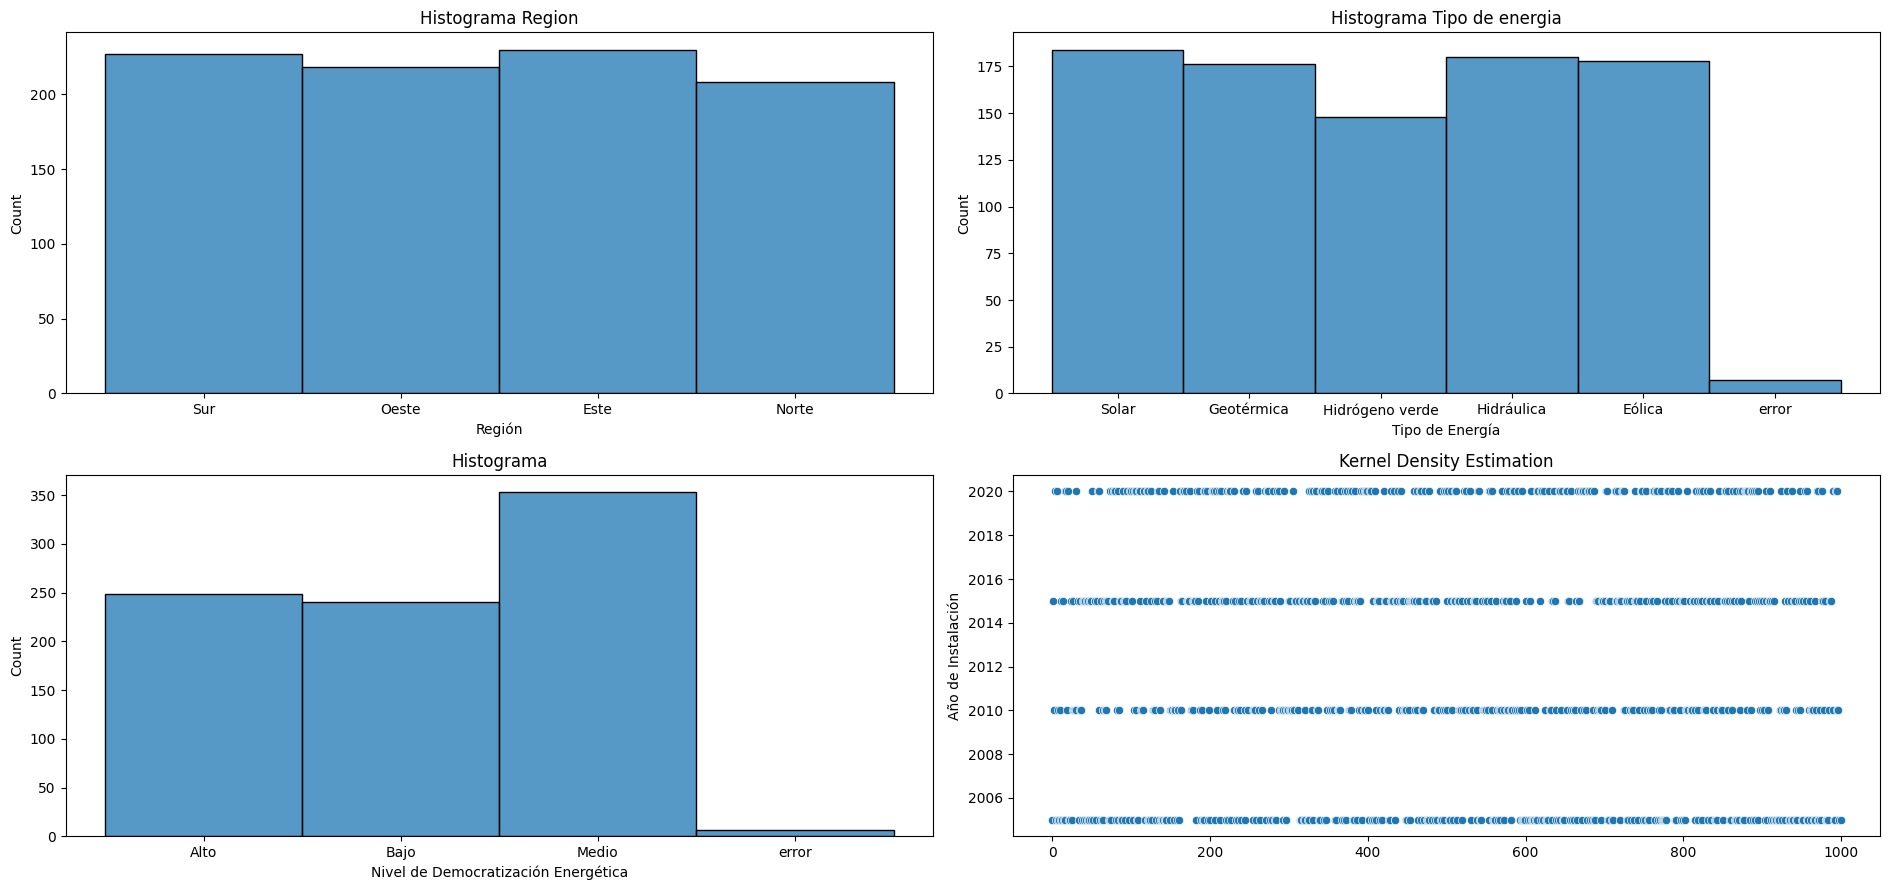

In [116]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(19, 9))

sns.histplot(df['Región'], ax=axes[0, 0])
sns.histplot(df['Tipo de Energía'], ax=axes[0, 1])
sns.histplot(df['Nivel de Democratización Energética'], ax=axes[1, 0])
sns.scatterplot(df['Año de Instalación'], ax=axes[1, 1])
# Añadir títulos y etiquetas a los subplots
axes[0, 0].set_title('Histograma Region')
axes[0, 1].set_title('Histograma Tipo de energia')
axes[1, 0].set_title('Histograma')
axes[1, 1].set_title('Kernel Density Estimation')
# Ajustar el espaciado entre los subplots
plt.tight_layout()
# Mostrar los subplots
plt.show()

<Axes: xlabel='Costo de Producción ($/MW)', ylabel='Planta Energética'>

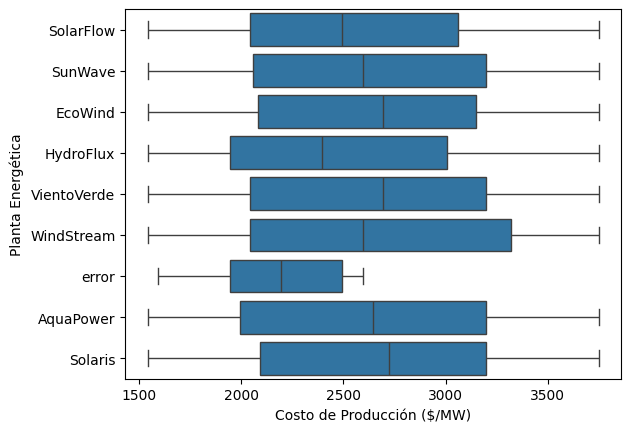

In [83]:
sns.boxplot(x='Costo de Producción ($/MW)', y='Planta Energética', data=df)

---
## **5) Identificación y manejo de valores atípicos y tendencias en los datos - Dimension de la calidad de datos**

In [137]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,70
Nivel de Democratización Energética,95
Número de Comunidades Energéticas,4
Número de Proyectos en Marcha,0
Capacidad Generada (MW),10
Reducción de CO2 (toneladas),4
Región,60
Costo de Producción ($/MW),0
Año de Instalación,0


In [138]:
data_eliminados_te = df.copy()
data_eliminados_te.head()

,Planta Energética,Tipo de Energía,Nivel de Democratización Energética,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Región,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
0,SolarFlow,Solar,Alto,42,1.000000,100.46,48910.59373127165,Sur,1893.656170,2005,1
1,SunWave,Solar,Bajo,12,17.000000,nan,156615.16814130466,Oeste,3398.187477,2015,0
2,EcoWind,NaN,Bajo,47,10.375328,52.62,25618.907447138306,Sur,1642.900952,2010,0
3,SolarFlow,Geotérmica,NaN,24,11.000000,nan,381289.3836417021,Este,2796.374954,2010,1
4,HydroFlux,Hidrógeno verde,Medio,37,5.000000,404.25,196815.72283363095,Norte,2144.411388,2020,1


In [139]:
data_eliminados['Número de Comunidades Energéticas'].isnull().sum()

0

In [140]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,70
Nivel de Democratización Energética,95
Número de Comunidades Energéticas,4
Número de Proyectos en Marcha,0
Capacidad Generada (MW),10
Reducción de CO2 (toneladas),4
Región,60
Costo de Producción ($/MW),0
Año de Instalación,0


---
## **6)Limpieza de datos**

In [141]:
df.describe()

,Número de Proyectos en Marcha,Costo de Producción ($/MW),Año de Instalación,"Rentabilidad en 10 años (Rentable=1, No Rentable=0)"
count,943.000000,943.000000,943.000000,943.000000
mean,10.375328,2613.693263,2012.120891,0.583245
std,4.906196,654.127548,5.577881,0.493283
min,1.000000,1542.598865,2005.000000,0.000000
25%,7.000000,2044.109301,2005.000000,0.000000
50%,10.375328,2595.770780,2010.000000,1.000000
75%,14.000000,3197.583303,2015.000000,1.000000
max,19.000000,3749.244782,2020.000000,1.000000


In [142]:
var = ['Número de Comunidades Energéticas','Número de Proyectos en Marcha','Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)']
for columna in var:
  df[columna] = df[columna].replace(['null', ' NA', '@#$'], np.nan)

In [143]:
df['Número de Proyectos en Marcha'].value_counts()

,count
Número de Proyectos en Marcha,
10.375328,181
17.000000,56
13.000000,53
15.000000,52
8.000000,48
16.000000,46
3.000000,45
19.000000,40
10.000000,38


---
## **7)Eliminación de registros con datos faltantes o imputación de valores categóricos.**


In [144]:
df[['Capacidad Generada (MW)']].replace('@#$', np.nan, inplace=True)

<ipython-input-144-196c01e3e81c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Capacidad Generada (MW)']].replace('@#$', np.nan, inplace=True)


In [145]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,70
Nivel de Democratización Energética,95
Número de Comunidades Energéticas,4
Número de Proyectos en Marcha,0
Capacidad Generada (MW),10
Reducción de CO2 (toneladas),4
Región,60
Costo de Producción ($/MW),0
Año de Instalación,0


In [146]:
df['Número de Comunidades Energéticas']

,Número de Comunidades Energéticas
0,42
1,12
2,47
3,24
4,37
...,...
994,7
995,20
996,23
997,22


In [147]:
df.value_counts()

Planta Energética  Tipo de Energía  Nivel de Democratización Energética  Número de Comunidades Energéticas  Número de Proyectos en Marcha  Capacidad Generada (MW)  Reducción de CO2 (toneladas)  Región  Costo de Producción ($/MW)  Año de Instalación  Rentabilidad en 10 años (Rentable=1, No Rentable=0)
AquaPower          Eólica           Alto                                 21                                 16.0                           812.36                   395510.7497863412             Sur     2946.828085                 2005                0                                                      1
SunWave            Geotérmica       Bajo                                 28                                 18.0                           489.55                   238345.4226671714             Sur     2595.770780                 2010                1                                                      1
                                                                         42                                 9.0                            352.17                   171459.72321662292            Oeste   1893.656170                 2005                1                                                      1
                                                                                                            13.0                           52.31                    25467.97887798945             Norte   1893.656170                 2005                1                                                      1
                                                                         43                                 4.0                            205.66                   100128.93397146455            Norte   1843.505127                 2005                0                                                      1
                                                                                                                                                                                                                                                                                                                ..
HydroFlux          Solar            Bajo                                 14                                 3.0                            nan                      86355.48487075108             Oeste   3297.885390                 2015                1                                                      1
                                                                         16                                 16.0                           819.45                   398962.63222268125            Oeste   3197.583303                 2015                1                                                      1
                                                                         23                                 10.0                           271.83                   132344.88048946418            Oeste   2846.525998                 2015                0                                                      1
                                                                         28                                 3.0                            734.25                   357481.6190243501             Norte   2595.770780                 2005                1                                                      1
error              Solar            Bajo                                 30                                 12.0                           607.3                    295673.93562613253            Este    2495.468693                 2005                0                                                      1
Name: count, Length: 721, dtype: int64

In [176]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,70
Nivel de Democratización Energética,95
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,60
Costo de Producción ($/MW),0
Año de Instalación,0


---
Aplicación de técnicas de One-hot encoding, Label encoding, y Ordinal encoding.


In [177]:
df['Número de Proyectos en Marcha'].fillna(df['Número de Proyectos en Marcha'].mean(), inplace=True)

In [178]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,70
Nivel de Democratización Energética,95
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,60
Costo de Producción ($/MW),0
Año de Instalación,0


In [179]:
df.dtypes


,0
Planta Energética,object
Tipo de Energía,object
Nivel de Democratización Energética,object
Número de Comunidades Energéticas,float64
Número de Proyectos en Marcha,float64
Capacidad Generada (MW),float64
Reducción de CO2 (toneladas),float64
Región,object
Costo de Producción ($/MW),float64
Año de Instalación,int64


In [180]:
df['Capacidad Generada (MW)'] = pd.to_numeric(df['Capacidad Generada (MW)'], errors='coerce') #The errors='coerce' argument tells the function to replace invalid values with NaN
print(df['Capacidad Generada (MW)'].dtype)

float64


In [181]:
df['Capacidad Generada (MW)'].fillna(df['Capacidad Generada (MW)'].mean(), inplace=True)

In [182]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,70
Nivel de Democratización Energética,95
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,60
Costo de Producción ($/MW),0
Año de Instalación,0


In [183]:
df['Reducción de CO2 (toneladas)'] = pd.to_numeric(df['Reducción de CO2 (toneladas)'])
print(df['Reducción de CO2 (toneladas)'].dtype)

float64


In [184]:
df['Reducción de CO2 (toneladas)'].fillna(df['Reducción de CO2 (toneladas)'].mean(), inplace=True)

In [185]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,70
Nivel de Democratización Energética,95
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,60
Costo de Producción ($/MW),0
Año de Instalación,0


In [186]:
df['Número de Comunidades Energéticas'] = pd.to_numeric(df['Número de Comunidades Energéticas'])
print(df['Número de Comunidades Energéticas'].dtype)

float64


In [187]:
df['Número de Comunidades Energéticas'].fillna(df['Número de Comunidades Energéticas'].mean(), inplace=True)

In [188]:
df.isnull().sum()

,0
Planta Energética,0
Tipo de Energía,70
Nivel de Democratización Energética,95
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Región,60
Costo de Producción ($/MW),0
Año de Instalación,0


In [189]:
tde = df['Nivel de Democratización Energética']
tde

,Nivel de Democratización Energética
0,Alto
1,Bajo
2,Bajo
3,NaN
4,Medio
...,...
994,NaN
995,Bajo
996,Medio
997,Bajo


In [190]:
tipo_de_energia_num = pd.get_dummies(df['Tipo de Energía'], columns=['Tipo de Energía'], dtype=float)
tipo_de_energia_num

,Eólica,Geotérmica,Hidráulica,Hidrógeno verde,Solar,error
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
994,0.0,1.0,0.0,0.0,0.0,0.0
995,0.0,0.0,0.0,1.0,0.0,0.0
996,1.0,0.0,0.0,0.0,0.0,0.0
997,1.0,0.0,0.0,0.0,0.0,0.0


In [191]:
nivel_de_demo_energetica_num = pd.get_dummies(df['Nivel de Democratización Energética'], columns=['Nivel de Democratización Energética'], dtype=float)
nivel_de_demo_energetica_num

,Alto,Bajo,Medio,error
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
994,0.0,0.0,0.0,0.0
995,0.0,1.0,0.0,0.0
996,0.0,0.0,1.0,0.0
997,0.0,1.0,0.0,0.0


In [192]:
region_num = pd.get_dummies(df['Región'], columns=['Región'], dtype=float)
region_num

,Este,Norte,Oeste,Sur
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
994,0.0,0.0,0.0,0.0
995,0.0,1.0,0.0,0.0
996,1.0,0.0,0.0,0.0
997,0.0,1.0,0.0,0.0


In [193]:
nominaul_num = pd.concat([tipo_de_energia_num, nivel_de_demo_energetica_num, region_num], axis=1)
nominaul_num

,Eólica,Geotérmica,Hidráulica,Hidrógeno verde,Solar,error,Alto,Bajo,Medio,error,Este,Norte,Oeste,Sur
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [194]:
df_num = pd.concat([df[['Número de Comunidades Energéticas','Número de Proyectos en Marcha','Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)', 'Rentabilidad en 10 años (Rentable=1, No Rentable=0)']], nominaul_num], axis=1)
df_num

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",Eólica,Geotérmica,Hidráulica,Hidrógeno verde,Solar,error,Alto,Bajo,Medio,error,Este,Norte,Oeste,Sur
0,42.0,1.000000,100.460000,48910.593731,1893.656170,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,12.0,17.000000,492.712921,156615.168141,3398.187477,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,47.0,10.375328,52.620000,25618.907447,1642.900952,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,24.0,11.000000,492.712921,381289.383642,2796.374954,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,37.0,5.000000,404.250000,196815.722834,2144.411388,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,7.0,10.375328,384.440000,187170.900399,3648.942695,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995,20.0,10.375328,522.120000,254202.659755,2996.979129,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,23.0,7.000000,492.712921,203987.264200,2846.525998,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,22.0,10.375328,207.350000,100951.738107,2896.677042,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [195]:
df_num.dtypes

,0
Número de Comunidades Energéticas,float64
Número de Proyectos en Marcha,float64
Capacidad Generada (MW),float64
Reducción de CO2 (toneladas),float64
Costo de Producción ($/MW),float64
"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",int64
Eólica,float64
Geotérmica,float64
Hidráulica,float64
Hidrógeno verde,float64


In [196]:
df_num.isnull().sum()

,0
Número de Comunidades Energéticas,0
Número de Proyectos en Marcha,0
Capacidad Generada (MW),0
Reducción de CO2 (toneladas),0
Costo de Producción ($/MW),0
"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",0
Eólica,0
Geotérmica,0
Hidráulica,0
Hidrógeno verde,0


---
## **8)Normalización de Datos: Aplicar técnicas de Min-Max Scaling y escalado robusto para normalizar los datos y mejorar el rendimiento del modelo.**

In [203]:
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


In [207]:
print(df_num.columns)


Index(['Número de Comunidades Energéticas', 'Número de Proyectos en Marcha',
       'Capacidad Generada (MW)', 'Reducción de CO2 (toneladas)',
       'Costo de Producción ($/MW)',
       'Rentabilidad en 10 años (Rentable=1, No Rentable=0)', 'Eólica',
       'Geotérmica', 'Hidráulica', 'Hidrógeno verde', 'Solar', 'error', 'Alto',
       'Bajo', 'Medio', 'error', 'Este', 'Norte', 'Oeste', 'Sur'],
      dtype='object')


In [208]:
df_escalado = MinMaxScaler().fit_transform(df_num)
df_escalado

array([[0.84090909, 0.        , 0.09142556, ..., 0.        , 0.        ,
        1.        ],
       [0.15909091, 0.88888889, 0.48865578, ..., 0.        , 1.        ,
        0.        ],
       [0.95454545, 0.52085156, 0.04297852, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.40909091, 0.33333333, 0.48865578, ..., 0.        , 0.        ,
        0.        ],
       [0.38636364, 0.52085156, 0.19967189, ..., 1.        , 0.        ,
        0.        ],
       [0.15909091, 0.11111111, 0.48865578, ..., 0.        , 0.        ,
        1.        ]])

---
## **9)Cálculo y visualización de matrices de correlación.**

<Axes: >

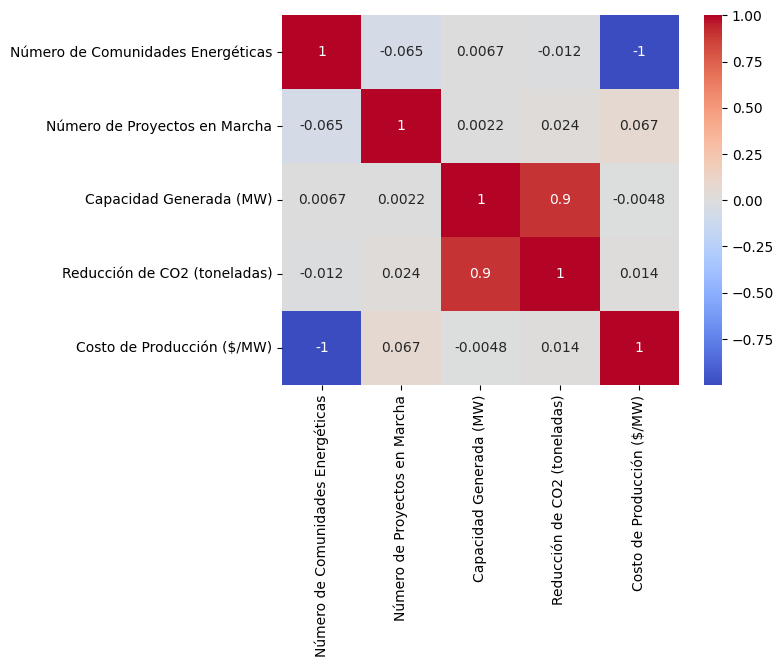

In [209]:
correlacion = df_num[['Número de Comunidades Energéticas','Número de Proyectos en Marcha','Capacidad Generada (MW)','Reducción de CO2 (toneladas)','Costo de Producción ($/MW)']].corr()

sns.heatmap(correlacion, annot=True, cmap='coolwarm')

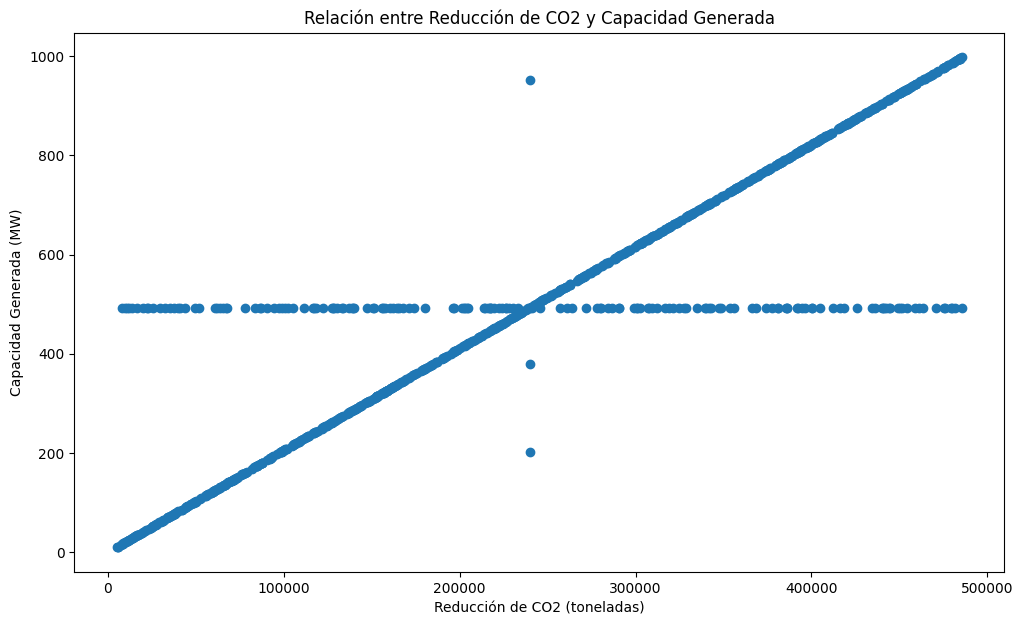

In [198]:
df['Reducción de CO2 (toneladas)'] = pd.to_numeric(df['Reducción de CO2 (toneladas)'])
df['Capacidad Generada (MW)'] = pd.to_numeric(df['Capacidad Generada (MW)'])

plt.figure(figsize=(12, 7))
plt.scatter(df['Reducción de CO2 (toneladas)'], df['Capacidad Generada (MW)'])

plt.xlabel('Reducción de CO2 (toneladas)')
plt.ylabel('Capacidad Generada (MW)')
plt.title('Relación entre Reducción de CO2 y Capacidad Generada')
plt.show()

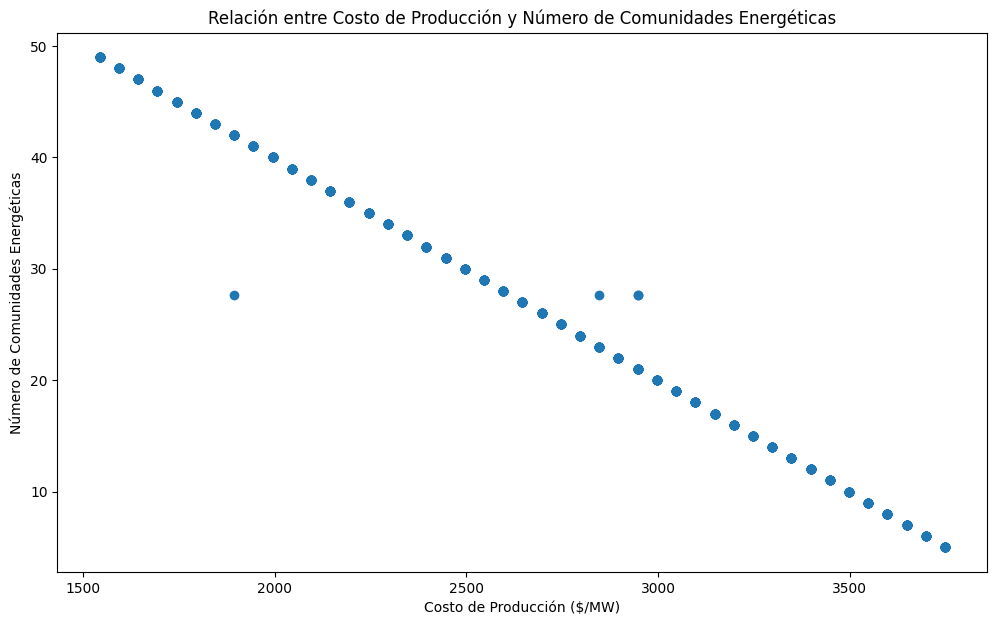

In [199]:
df['Costo de Producción ($/MW)'] = pd.to_numeric(df['Costo de Producción ($/MW)'])
df['Número de Comunidades Energéticas'] = pd.to_numeric(df['Número de Comunidades Energéticas'])

plt.figure(figsize=(12, 7))
plt.scatter(df['Costo de Producción ($/MW)'], df['Número de Comunidades Energéticas'])

plt.xlabel('Costo de Producción ($/MW)')
plt.ylabel('Número de Comunidades Energéticas')
plt.title('Relación entre Costo de Producción y Número de Comunidades Energéticas')
plt.show()

---
## **10)Aplicación de PCA para reducir la dimensionalidad de datasets**

In [211]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [215]:
df_num.describe()

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",Eólica,Geotérmica,Hidráulica,Hidrógeno verde,Solar,error,Alto,Bajo,Medio,error,Este,Norte,Oeste,Sur
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,27.646432,10.375328,492.712921,240099.515545,2613.693263,0.583245,0.188759,0.186638,0.190880,0.156946,0.195122,0.007423,0.264051,0.254507,0.374337,0.006363,0.243902,0.220573,0.231177,0.240721
std,13.030285,4.906196,260.479934,139619.792387,654.127548,0.493283,0.391525,0.389828,0.393203,0.363943,0.396505,0.085883,0.441060,0.435815,0.484208,0.079554,0.429662,0.414853,0.421809,0.427748
min,5.000000,1.000000,10.180000,4956.299464,1542.598865,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,7.000000,295.960000,118805.127238,2044.109301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,10.375328,492.712921,235604.365105,2595.770780,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39.000000,14.000000,687.740000,362442.787152,3197.583303,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49.000000,19.000000,997.650000,485722.216166,3749.244782,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [214]:
df_num.head()

,Número de Comunidades Energéticas,Número de Proyectos en Marcha,Capacidad Generada (MW),Reducción de CO2 (toneladas),Costo de Producción ($/MW),"Rentabilidad en 10 años (Rentable=1, No Rentable=0)",Eólica,Geotérmica,Hidráulica,Hidrógeno verde,Solar,error,Alto,Bajo,Medio,error,Este,Norte,Oeste,Sur
0,42.0,1.000000,100.460000,48910.593731,1893.656170,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,12.0,17.000000,492.712921,156615.168141,3398.187477,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,47.0,10.375328,52.620000,25618.907447,1642.900952,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,24.0,11.000000,492.712921,381289.383642,2796.374954,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,37.0,5.000000,404.250000,196815.722834,2144.411388,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


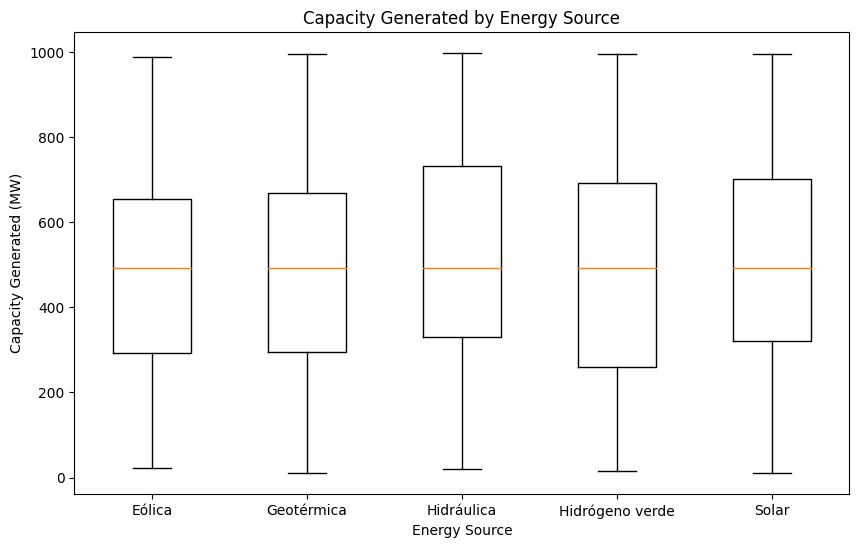

In [221]:
# @title Capacity Generated by Energy Source

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot([df_num[df_num['Eólica'] == 1]['Capacidad Generada (MW)'],
             df_num[df_num['Geotérmica'] == 1]['Capacidad Generada (MW)'],
             df_num[df_num['Hidráulica'] == 1]['Capacidad Generada (MW)'],
             df_num[df_num['Hidrógeno verde'] == 1]['Capacidad Generada (MW)'],
             df_num[df_num['Solar'] == 1]['Capacidad Generada (MW)']],
            labels=['Eólica', 'Geotérmica', 'Hidráulica', 'Hidrógeno verde', 'Solar'])
plt.xlabel('Energy Source')
plt.ylabel('Capacity Generated (MW)')
_ = plt.title('Capacity Generated by Energy Source')

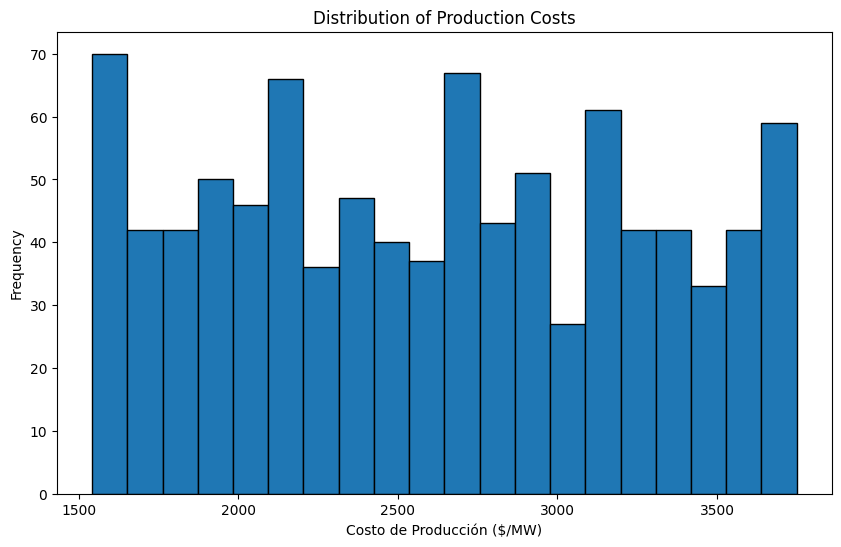

In [219]:
# @title Distribution of Production Costs

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_num['Costo de Producción ($/MW)'], bins=20, edgecolor='black')
plt.xlabel('Costo de Producción ($/MW)')
plt.ylabel('Frequency')
_ = plt.title('Distribution of Production Costs')

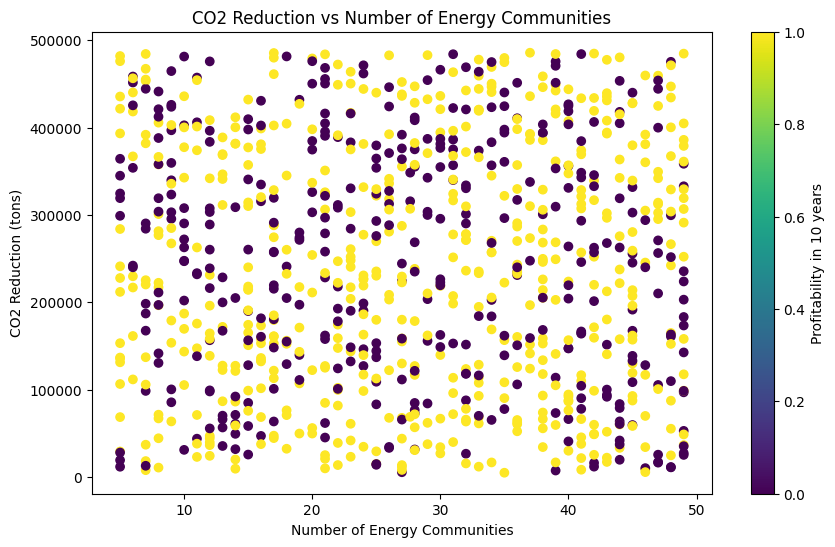

In [218]:
# @title CO2 Reduction vs Number of Energy Communities

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_num['Número de Comunidades Energéticas'], df_num['Reducción de CO2 (toneladas)'], c=df_num['Rentabilidad en 10 años (Rentable=1, No Rentable=0)'], cmap='viridis')
plt.xlabel('Number of Energy Communities')
plt.ylabel('CO2 Reduction (tons)')
plt.title('CO2 Reduction vs Number of Energy Communities')
_ = plt.colorbar(label='Profitability in 10 years')

In [225]:
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

df_num_pca = PCA(n_components=2).fit_transform(df_num_scaled)

In [226]:
df_num_pca = pd.DataFrame(df_num_pca, columns=['PC1', 'PC2'])
df_num_pca.head()

,PC1,PC2
0,-2.080031,-1.975694
1,1.840482,-0.411847
2,-2.306965,-1.869165
3,0.436066,0.400549
4,-1.236325,-0.395583
